# Diabetes prediction using python

In [1]:
#We will import all the library and its function 


import numpy as np
import seaborn as sns
import pandas as pd 


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Numpy is used for working with the arrays. It gives the high performance multidimensional array object

Seaborn will be used for building the charts and plots for the data visualization

sklearn: scikit learn library provides supervised and unsupervised learning algorithms such as Regression, Classification, and model Preprocessing

pandas: used for reading datasets in .csv format and also used for data manupulation


By Shushant

In [2]:
diabetes_dataset= pd.read_csv('diabetes.csv')

In [3]:
#diabetes_dataset

In [4]:
diabetes_dataset.head()

#by shushant

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Name of the columns and their meanings

1.Pregnancies	---No. of times the individual was pregnant

2.Glucose       ---Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3.BloodPressure ---Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you  have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.

4.SkinThickness --- increased in insulin-dependent diabetes mellitus and tricep skin fold thickness in mm.

5.BMI           ---Body Mass index and the formula is (weight in Kg/(height in metre)^2)

6.Insulin       ---2-hour serum insulin (mu U/ml)

7.DiabetesPedigreeFunction ---indicates the function which scores likelihood of diabetes based on family history. 

8.Age           ---Age of the individual

9.Outcome       ---class variable (Binary classification with 0 and 1)

##                   268 of 768 are '1'
##                   500 of 768 are '0'


By Shushant

# Basic Dataset Exploration



In [5]:
#Our dataset dimesnions

diabetes_dataset.shape

(768, 9)

In [6]:
#list the types of all columns

diabetes_dataset.dtypes

#by Shushant

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# getting overview of columns
diabetes_dataset.info()

#There is no missing values
#By Shushant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# More details about the dataset

In [8]:
#statistical summary

df2 = diabetes_dataset.describe()
print(df2)

#By Shushant

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [9]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Out of 768 people from the dataset, 268 people are diabetic(outcome result = '1') and 500 people are non-diabetic (outcome result = '0')

In [10]:
#The isna() function is used to detect missing values. Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.

diabetes_dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

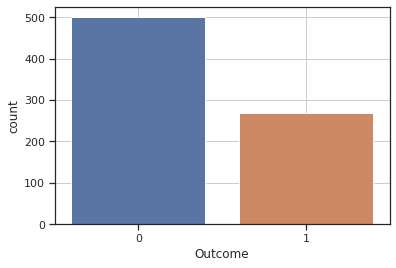

In [11]:


sns.set(style="ticks")
sns.countplot(x='Outcome',data=diabetes_dataset)
plt.grid()

plt.show()

#By Shushant
#class notes

In [12]:
# mean values dpends upon the 0s and 1s
diabetes_dataset.groupby('Outcome').mean()

#By Shushant

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


  - Correlation is usually an indicative of good information content
  - In data analysis, you might to see that or use variables that are     correlated with your outcome variable

In [13]:


diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
diabetes_dataset.min()

# By Shushant

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [15]:
diabetes_dataset.max()

# By Shushant

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

A Heat map is a graphical representation of multivariate data that is structured as a matrix of columns and rows.

Heat maps are very useful in describing correlation among several numerical variables, visualizing patterns and anomalies. We can see that there is a high correlation between Outcome and [Pregnanacies,Glucose,BMI, Age, Insulin]

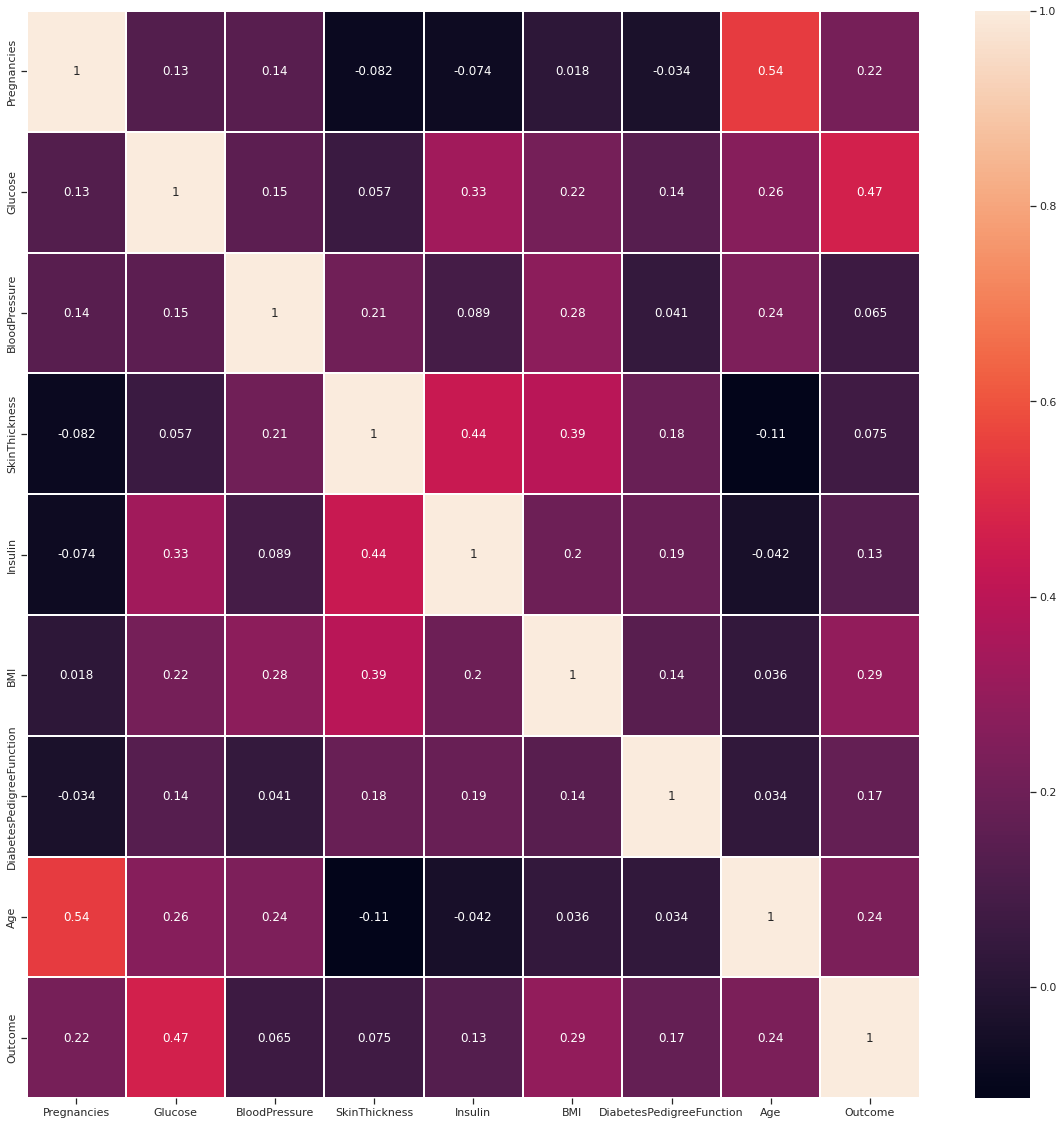

In [16]:

#show correlation between two variables, 0.x means x% similar
plt.figure(figsize=(20, 20))
sns.heatmap(diabetes_dataset.corr(), annot=True, linewidths=2)
plt.show()

#By Shushant

Ex: correlatiom between Glucose and Outcome is 47% that means output depends majorly on Glucose

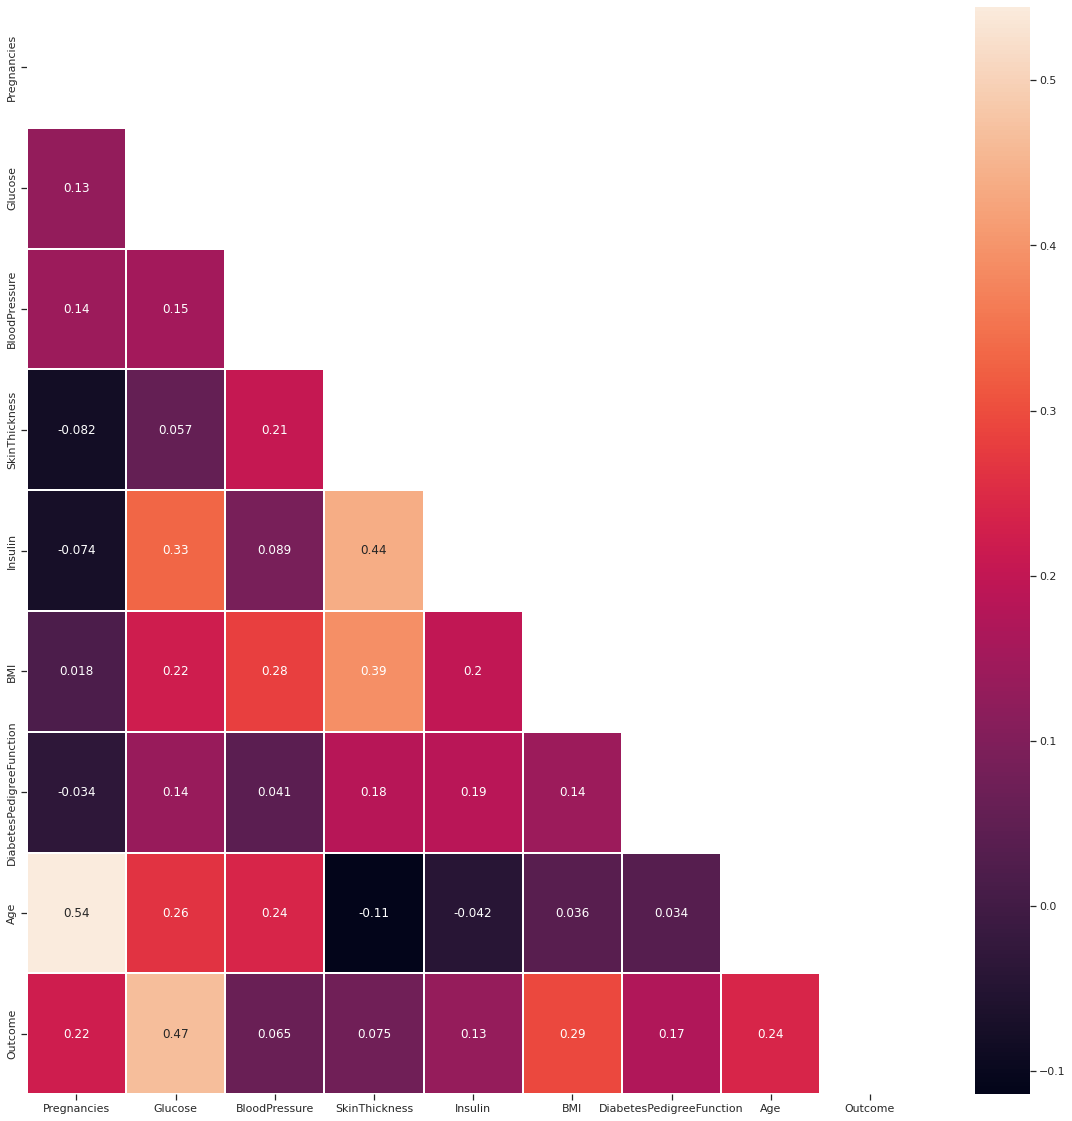

In [17]:

#Correlation Analysis
matrix =np.triu(diabetes_dataset.corr())

plt.figure(figsize=(20, 20))
sns.heatmap(diabetes_dataset.corr(), annot=True, linewidths=2,mask=matrix)
plt.show()

#By Shushant

In [18]:

#Import this to ignore those warnings that kernel gives
import warnings
warnings.filterwarnings('ignore')

#By Shushant

# Box plots, Swarm plots and Violin plots

In [19]:
# #sns.set_style("whitegrid")
# plt.figure(figsize=(14,8))
# sns.boxplot(data =diabetes_dataset)
# sns.swarmplot(data=diabetes_dataset)
# # save the figure
# plt.savefig('plot.png', dpi=300, bbox_inches='tight')
# plt.show()




# # by shushant
# #class notes

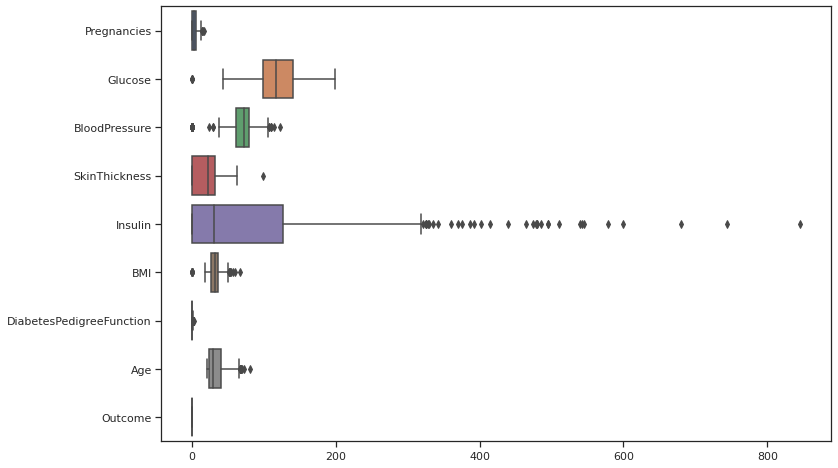

In [20]:

plt.figure(figsize=(12,8))
sns.boxplot(data =diabetes_dataset, orient ="h")

plt.show()

#By Shushant
#class notes

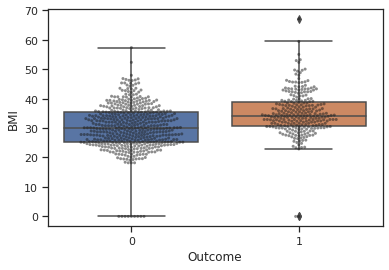

In [21]:
sns.boxplot(x="Outcome", y = "BMI",data=diabetes_dataset, whis = 3.0);
sns.swarmplot(x="Outcome", y = "BMI",data=diabetes_dataset,size =3, color = "k",alpha =0.5);

plt.show()

# By shushant
#class notes

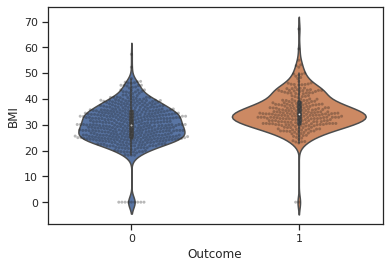

In [22]:
sns.violinplot(x="Outcome", y = "BMI",data=diabetes_dataset, whis = 3.0);
sns.swarmplot(x="Outcome", y = "BMI",data=diabetes_dataset,size =3, color = "k",alpha =0.3);

plt.show()

# by Shushant
#class notes

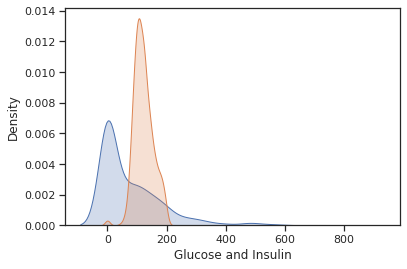

In [23]:


sns.kdeplot(x= diabetes_dataset['Insulin'],data = diabetes_dataset,shade = True)
sns.kdeplot(x = diabetes_dataset['Glucose'],data = diabetes_dataset,shade = True)
plt.xlabel("Glucose and Insulin")
plt.show()

#By Shushant

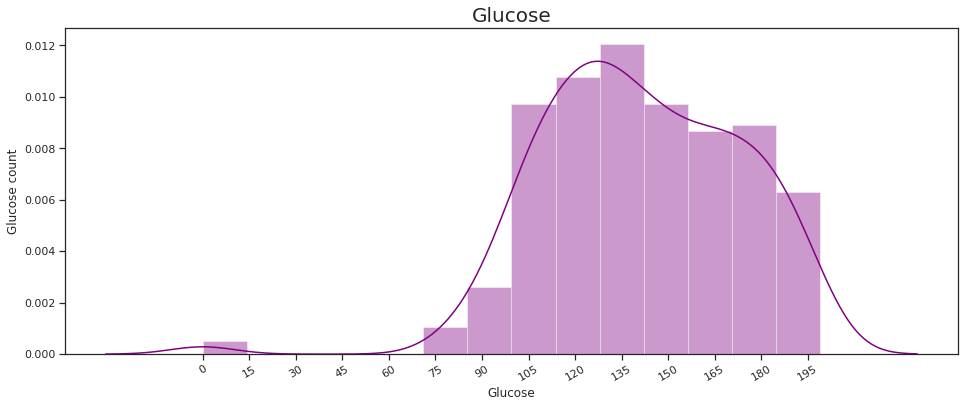

In [24]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.distplot(diabetes_dataset["Glucose"][diabetes_dataset["Outcome"] == 1],color="purple" )
plt.xticks([i for i in range(0,201,15)],rotation = 30)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)
plt.show()

#By Shushant

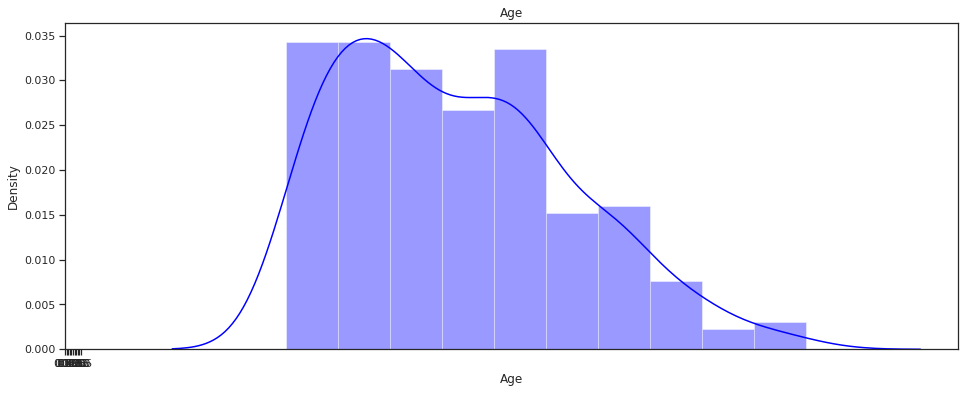

In [25]:
fig = plt.figure(figsize = (16,6))

sns.distplot(diabetes_dataset["Age"][diabetes_dataset["Outcome"] == 1],color="blue")
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")
plt.show()


#By Shushant

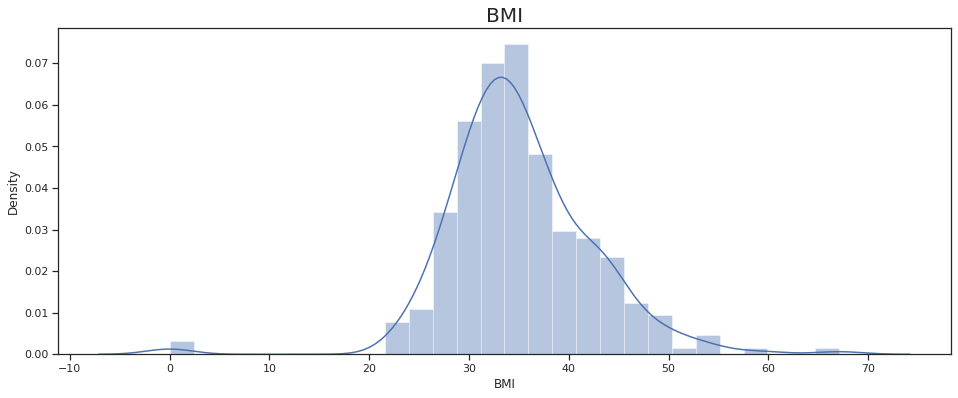

In [26]:
fig = plt.figure(figsize =(16,6))

sns.distplot(diabetes_dataset["BMI"][diabetes_dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)
plt.show()


#By Shushant

In [27]:
# we are separating the data lebels
#The drop() method removes the specified row or column by specifying
# the column axis {axis = 'Columns'} using pandas library

X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

### Drop a column and store in  Y = diabetes_dataset['Outcome']

In [28]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [29]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data standardization

In [30]:
# Python --from sklearn  StandardScaler() function to standardize the data values into a standard format

scaler = StandardScaler()

In [31]:
scaler.fit(X)

StandardScaler()

In [32]:
'''
self-produced dataframe with transformed
values after applying the function specified in 
its parameter or range
'''



standardized_data = scaler.transform(X)

# based on the above method standardization, we are transfroming
# all the data to a common range

In [33]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [34]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [35]:
print(X) # represents the data 

print(Y) # represents the model

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [36]:
# Train test Split 
# we have imported 
#from sklearn.model_selection import train_test_split




X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

# from class notes also

The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset.

For example, if there are 100 observations in the entire original dataset of which 80 are class a and 20 are class b and you set stratify = True, with a .7 : .3 train-test split, you will get a training set with 56 examples of class a and 14 examples of class b.

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [38]:
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (614,) (154,)


# Train the model
Support vector machine(SVM)


This function will load our support vector machine

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
#Training SVM
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [41]:
#predict() function enables us to predict the labels of the data values on the basis of the trained model.
X_train_prediction = classifier.predict(X_train)


In [42]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
#Accuracy score
print(f"Accuracy score of the training data :{training_data_accuracy}")
#By Shushant

Accuracy score of the training data :0.7866449511400652


In [44]:

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
#Accuracy score
print(f"Accuracy score of the test data :{test_data_accuracy}")

#By Shushant


Accuracy score of the test data :0.7727272727272727


In [46]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)


prediction = classifier.predict(std_data)


if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic


In [47]:
import joblib
#joblib.dump(df,'diabetes_model')

# class notes

In [48]:
joblib.dump(classifier,'diabetes_model2')

['diabetes_model2']

In [49]:

model1 = joblib.load('diabetes_model2')

In [50]:
model1.predict(std_data)

array([1])

# Graphical user interface (GUI)

In [51]:
#class notes


from tkinter import *

import joblib

import numpy as np

from sklearn import *

def show_entry_fields():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    
    model1 = joblib.load('diabetes_model2')
    input_data = (p1,p2,p3,p4,p5,p6,p7,p8)
    
    
    #input_data = (5,166,72,19,175,25.8,0.587,51)
                # try = (6,148,72,35,0,33.6,0.627,50)
                # try1 =(1,93,70,31,0,30.4,0.315,23)
                #try2 = (4,110,92,0,0,37.6,0.191,30)


    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # standardize the input data
    std_data = scaler.transform(input_data_reshaped)
    #print(std_data)

    prediction = classifier.predict(std_data)
    #print(prediction)

    if (prediction[0] == 0):
        print('The person is not diabetic')
    else:
        print('The person is diabetic')

    

            
master = Tk()
master.geometry("540x400")
master.title("Diabetes prediction")

#label = Label(master,text = "Diabetes prediction" ,bg = "gray", width = "300", height="2", 
                             # fg = "white", font= ("Calibri 20 bold italic underline")).grid(row = 0, columnspan =5)

label = Label(master,text = "Diabetes prediction using ML",bg = "black", 
                              fg = "white",font= ("Calibri 20 bold italic underline")).grid(row = 0, columnspan =5)

Label(master,text="Enter the value for pregnancies",font=("Verdana 12")).grid(row=1)
Label(master,text="Enter the value for Glucose",font=("Verdana 12")).grid(row=2)
Label(master,text="Enter the value for BloodPressure",font=("Verdana 12")).grid(row=3)
Label(master,text="Enter the value for SkinThickness",font=("Verdana 12")).grid(row=4)
Label(master,text="Enter The value for Insulin",font=("Verdana 12")).grid(row=5)
Label(master,text="Enter the value for BMI",font=("Verdana 12")).grid(row=6)
Label(master,text="Enter the value for DiabetesPedigreeFunction",font=("Verdana 12")).grid(row=7)
Label(master,text="Enter the value for Age",font=("Verdana 12")).grid(row=8)

def reset():
    e1.delete(0,END)
    e2.delete(0,END)
    e3.delete(0,END)
    e4.delete(0,END)
    e5.delete(0,END)
    e6.delete(0,END)
    e7.delete(0,END)
    e8.delete(0,END)
    

    
# def reset():
#     p1.set("")
#     p2.set("")
#     p3.set("")
#     p4.set("")
#     p5.set("")
#     p6.set("")
#     p7.set("")
#     p8.set("")

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)


    
    
    


submit= Button(master,text="Predict",width ="12",height = "1",activebackground ="violet", bg = "Pink", command=show_entry_fields,font= ("Calibri 12")).place(x =290,y = 340)

reset = Button(master, text= "Reset", width = "12", height = "1", activebackground = "red", command= reset, bg = "pink",font=("Calibri 12")).place(x=90,y=340)


master.mainloop()
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
    
    

    
#By Shushant

The person is diabetic
The person is diabetic
The person is not diabetic


# Thank you